In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import urllib
import cv2
import os

In [2]:
model = load_model('model/model_v0.990099.h5')

In [3]:
def predict_pair(image1, image2, model):
    prediction = model.predict([[image1], [image2]])
    if prediction > 0.5:
        print("Да")
    else:
        print("Нет")

def load_image_from_path(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (150, 150))
    image = img_to_array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

def load_image_from_url(url):
    response = urllib.request.urlopen(url)
    image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (150, 150))
    image = img_to_array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

In [4]:
def compare_with_database(image):
    database_folder = "Database"

    plt.imshow(image.squeeze())
    plt.axis('off')
    plt.show()

    database_images = []
    database_filenames = []
    for filename in os.listdir(database_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(database_folder, filename)
            database_image = load_image_from_path(image_path)
            database_images.append(database_image)
            database_filenames.append(filename)

    image1 = np.repeat(image, len(database_images), axis=0)
    image2 = np.array(database_images)

    image1 = np.reshape(image1, (-1, 150, 150, 3))
    image2 = np.reshape(image2, (-1, 150, 150, 3))

    predictions = model.predict([image1, image2])
    index = np.argmax(predictions > 0.5)
    
    if np.any(predictions > 0.5):
        found_image = cv2.imread(os.path.join(database_folder, database_filenames[index]))
        found_image = cv2.cvtColor(found_image, cv2.COLOR_BGR2RGB)
        plt.imshow(found_image)
        plt.axis('off')
        plt.show()
        print("Человек найден в базе данных")
    else:
        print("Человек не найден в базе данных")

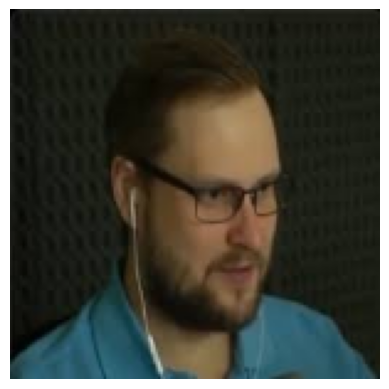

1/1 [==============================] - 1s 507ms/step


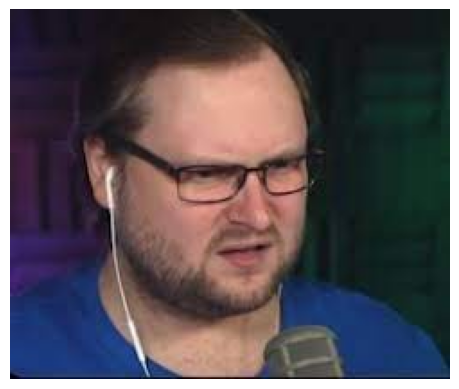

Человек найден в базе данных


In [5]:
image_test_path_1=load_image_from_path('test/test_ (2).jpg')
compare_with_database(image_test_path_1)

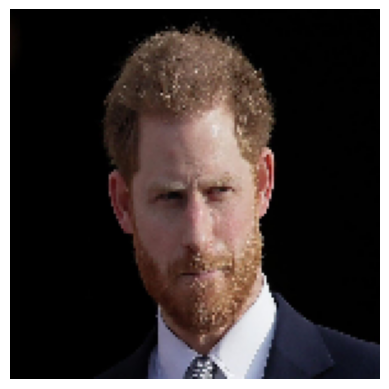

1/1 [==============================] - 0s 247ms/step
Человек не найден в базе данных


In [6]:
image_test_path_2=load_image_from_path('test/test_ (7).jpg')
compare_with_database(image_test_path_2)

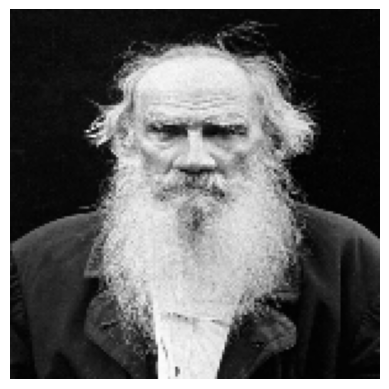

1/1 [==============================] - 0s 247ms/step


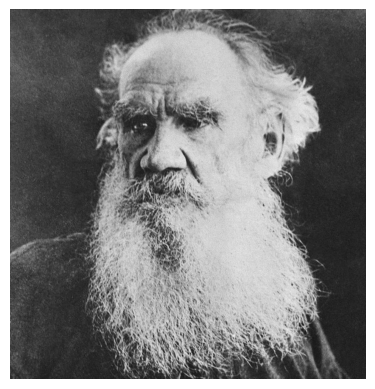

Человек найден в базе данных


In [7]:
image_test_url_1=load_image_from_url('https://cdnn21.img.ria.ru/images/15107/76/151077691_0:0:0:0_600x0_80_0_1_7271a4fd0a9336b7aafaa47535c1d217.jpg')
compare_with_database(image_test_url_1)

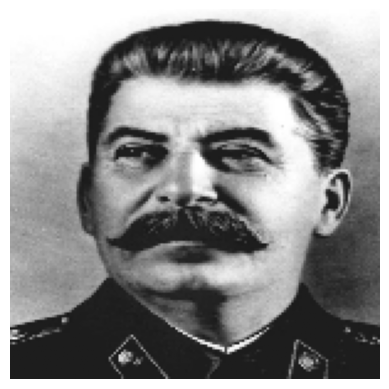

1/1 [==============================] - 0s 355ms/step


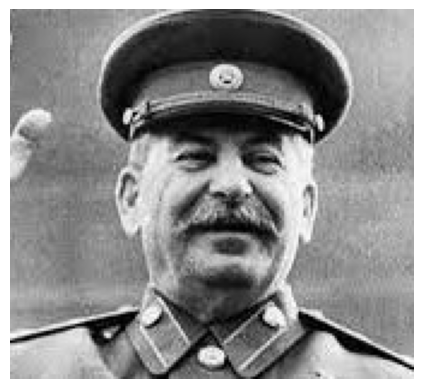

Человек найден в базе данных


In [9]:
image_test_url_2=load_image_from_url('https://cdn-media.tass.ru/width/1020_b9261fa1/tass/m2/uploads/i/20151231/4160974.jpg')
compare_with_database(image_test_url_2)